In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [251]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

In [200]:
wine = pd.read_csv('winequalityN.csv')

In [201]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Segun el dataset de wine, realice las siguientes actividades:
- Limpie las variables numericas. (evalue primero si vale la pena estretificar por type), en caso de existir valores atipicos remplece por la media.
- Aplique PCA utilizando maximo 5 columnas (evalue si el PCA vale la pena hacer uno para white y otro para red)
    - No se debe de usar quality para este ejercicio
- Una ves tenga el PCA, aplique un algoritmo de k-means para crear tres perfiles del vino. (explique que significa cada perfil)
- Agregue la nueva variable al dateset y elimine las columnas que hayan formado parte de analisis del PCA, tanto para white como para red, en caso que hayan sido entrenamientos distintos.
- Crea la varible de respuesta de la siguiente manera:
    - if quality >= 5 ? 1 else 0
- Elimine la variable quality del dataset
- Aplique los siguientes entrenamientos de MLS (evalue primero si vale la pena estretificar por type):
    - Regresion Logistica
    - NN
    - Aroboles de desiciones
    - Random Forest
- Explique cual de los entrenamientos fue el mejor?

# RESOLUCIÓN DE EXÁMEN

### Ejercicio #1: Limpieza de variables númericas

#### Tipo de dato de las columnas

In [183]:
wine.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

####

#### En el conteo de los valores númericos de las columnas se puede detectar que hay valores nulos

In [184]:
wine.count()

type                    6497
fixed acidity           6487
volatile acidity        6489
citric acid             6494
residual sugar          6495
chlorides               6495
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6488
sulphates               6493
alcohol                 6497
quality                 6497
dtype: int64

#### Comprobando si hay valores nulos en las columnas

In [185]:
wine.isnull().any()

type                    False
fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
chlorides                True
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                       True
sulphates                True
alcohol                 False
quality                 False
dtype: bool

######

#### Conteo de datos nulos en las columnas

In [186]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

#### 

#### Valor media de las columnas del DataFrame original

In [187]:
wine.mean(axis = 0)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9320\1224247678.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wine.mean(axis = 0)


fixed acidity             7.216579
volatile acidity          0.339691
citric acid               0.318722
residual sugar            5.444326
chlorides                 0.056042
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218395
sulphates                 0.531215
alcohol                  10.491801
quality                   5.818378
dtype: float64

### Rellenando los valores nulos de las columnas por el valor de la media de sus columnas y creando un nuevo DataFrame

In [188]:
df1= wine.fillna(value=wine.mean())

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9320\1317728993.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1= wine.fillna(value=wine.mean())


#### Comprobando nuevamente si existen valores nulos en las columnas del nuevo DataFrame

In [189]:
df1.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

######

In [190]:
df1

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


### Ejercicio #2: Aplicando PCA (Máximo 5 columnas)

#### ******No usar la columna quality

###### Dividimos los datos de las columnas

In [240]:
X = df1.iloc[:,1:11].values
y = df1.iloc[:,0].values

###### Normalizamos los datos

In [241]:
X_std = StandardScaler().fit_transform(X)

###### Mandamos a imprimir la matriz de covarianza que nos dara la medida de dispersion de los valores

In [243]:
np.cov(X_std.T)

array([[ 1.00015394,  0.21995179,  0.32339831, -0.1122366 ,  0.29832757,
        -0.28328082, -0.32945956,  0.45901197, -0.25172162,  0.30027141],
       [ 0.21995179,  1.00015394, -0.37781694, -0.19660781,  0.37717969,
        -0.35310905, -0.41476972,  0.27114848,  0.26032309,  0.22534806],
       [ 0.32339831, -0.37781694,  1.00015394,  0.14247313,  0.03931562,
         0.13344672,  0.1951784 ,  0.09632231, -0.32840469,  0.05757267],
       [-0.1122366 , -0.19660781,  0.14247313,  1.00015394, -0.12890662,
         0.40330361,  0.49578046,  0.55257189, -0.26675823, -0.18574496],
       [ 0.29832757,  0.37717969,  0.03931562, -0.12890662,  1.00015394,
        -0.19500773, -0.27959052,  0.36263604,  0.04476053,  0.39513374],
       [-0.28328082, -0.35310905,  0.13344672,  0.40330361, -0.19500773,
         1.00015394,  0.72104506,  0.0257208 , -0.14513788, -0.18849983],
       [-0.32945956, -0.41476972,  0.1951784 ,  0.49578046, -0.27959052,
         0.72104506,  1.00015394,  0.0323995 

###### Calculamos los autovalores y autovectores de la matriz de covarianza

In [247]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.26763264 -0.43177343  0.31765597  0.43031601 -0.17314496 -0.1238023
   0.36737136 -0.11191303  0.43012682  0.27940254]
 [-0.39353247 -0.01695375 -0.34820128  0.0398547  -0.26225971  0.09257291
  -0.62793457  0.27619833  0.39218985  0.14234509]
 [ 0.1399779  -0.36161219  0.49393602 -0.08715355  0.28460626  0.1435744
  -0.48902952 -0.19767058  0.23203157 -0.40545994]
 [ 0.31131848 -0.37887359 -0.35591854  0.54786365 -0.25309896  0.20796128
  -0.16896843 -0.23227272 -0.36417211 -0.10135961]
 [-0.32195188 -0.2831634  -0.10505985  0.16561002  0.2442546  -0.06194168
   0.20819364  0.60848928 -0.17391544 -0.51995555]
 [ 0.42182088 -0.11560352 -0.22475164 -0.04095508  0.32424461  0.56538699
   0.22655615  0.28878367  0.3862928   0.21856236]
 [ 0.475331   -0.12903154 -0.17954931  0.07668443  0.18756492 -0.75969726
  -0.15490915  0.18781279  0.18874336  0.10989889]
 [-0.10785417 -0.55229978 -0.37475096 -0.63977099 -0.13404758 -0.0864581
   0.18219005 -0.26505078  0.03143884 -0

##### Calculamos la varianza explicada

In [248]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

###### Representamos en un diagrama de barras la varianza explicada

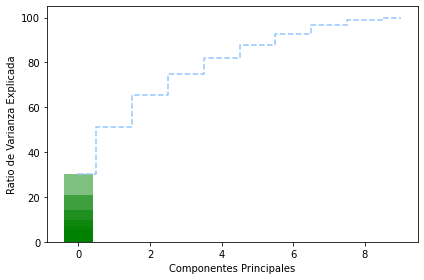

In [276]:
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(1), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(10), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.tight_layout()

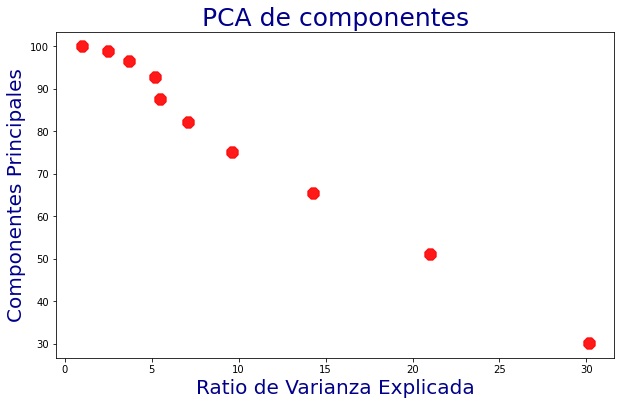

In [267]:
fig = plt.figure (figsize=(10,6))
plt.scatter(var_exp, cum_var_exp,
            marker="8", s=150, color="red", alpha=0.9)

plt.xlabel("Ratio de Varianza Explicada", fontsize=20, color="darkblue")
plt.ylabel("Componentes Principales", fontsize=20, color="darkblue")
plt.title('PCA de componentes', fontsize=25, color="darkblue")

plt.show()

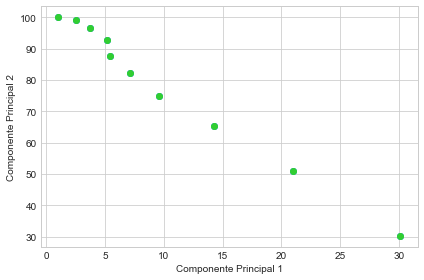

In [287]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('fixed acidity', 'volatile acidity', 'citric acid'),
                        ('magenta', 'cyan', 'limegreen')):
        plt.scatter(var_exp, cum_var_exp,
           
            label=lab,
                    c=col)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    ##plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()  